In [2]:
!apt install tesseract-ocr libtesseract-dev tesseract-ocr-jpn
!pip install pyocr
!pip install googletrans==4.0.0-rc1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev tesseract-ocr tesseract-ocr-eng
  tesseract-ocr-jpn tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,939 kB of archives.
After this operation, 32.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Ge

In [3]:
!tesseract --list-langs

List of available languages (3):
osd
eng
jpn


In [4]:
from PIL import Image
import pyocr

In [5]:
tools = pyocr.get_available_tools()
tool = tools[0]
print("Will use tool ‘%s'"% (tool.get_name()))

Will use tool ‘Tesseract (sh)'


In [6]:
from google.colab import files
uploaded_file = files.upload()

Saving test7.jpg to test7.jpg


In [7]:
file_name = list(uploaded_file.keys())[0]

In [8]:
img1 = Image.open(file_name)

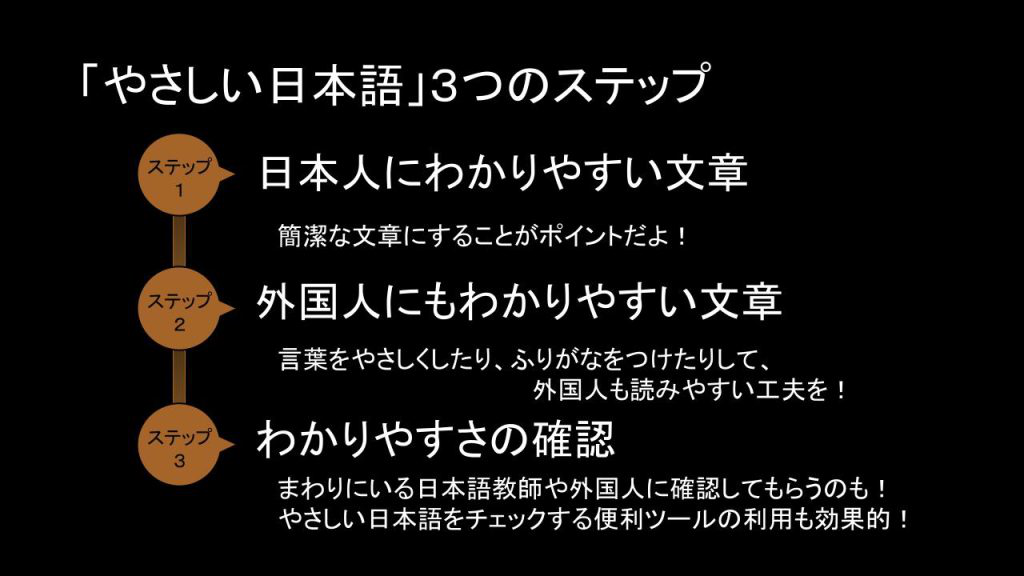

In [9]:
from PIL import ImageOps
img1_invert = ImageOps.invert(img1)
img1_invert.save("img1_invert.png")
img1_invert

In [10]:
import cv2
from google.colab.patches import cv2_imshow

results = tool.image_to_string(
    img1,
    lang='jpn',
    builder=pyocr.builders.WordBoxBuilder(tesseract_layout=3)
)

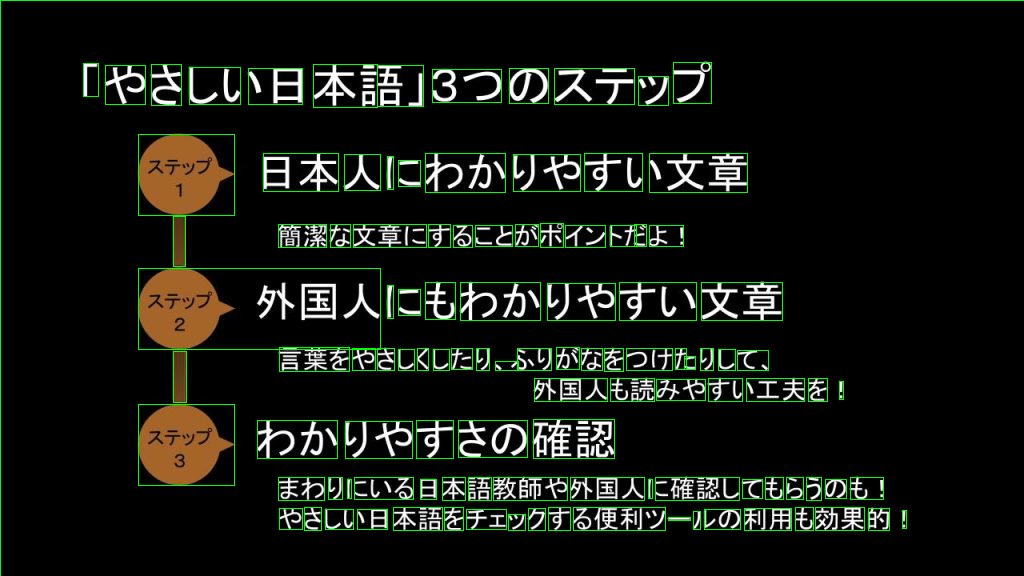

In [11]:
draw_rectangle = cv2.imread("img1_invert.png")

for box in results:
    cv2.rectangle(draw_rectangle, box.position[0], box.position[1], (0, 255, 0), 1)
cv2.imwrite('draw_rectangle.png', draw_rectangle)
draw_rectangle = Image.open('draw_rectangle.png')
draw_rectangle

In [12]:
txt1_invert = tool.image_to_string(img1_invert, lang="jpn", builder=pyocr.builders.TextBuilder(tesseract_layout=3))
print(txt1_invert)

「やさしい日本語」3つのステップ
ャス  日本人にわかりやすい文章

箇潔な文章にすることがポイントだよ !

と の間ルのNりEcaRe:

言葉をやさしくしたり、 ふりがなをつけたりして、
外国人も読みやすい工夫を

|
2 わかりやすさの確認

まわりにいる日本語教師や外国人に確認してもらうのも !
やさしい日本語をチェックする便利ツールの利用も効果的 !


In [13]:
from googletrans import Translator
 
tr = Translator()
result = tr.translate(txt1_invert, src="ja", dest="zh-cn").text
print(result)

“简单日语” 3步
SAS易于理解日本人

关键是要做一个干净的句子！

Nori Ecare：

温柔的话并添加水果，
容易为外国人阅读

|
2确认易于理解

请您周围的日语老师或外国人检查！
使用方便的工具检查柔和的日本也很有效！
